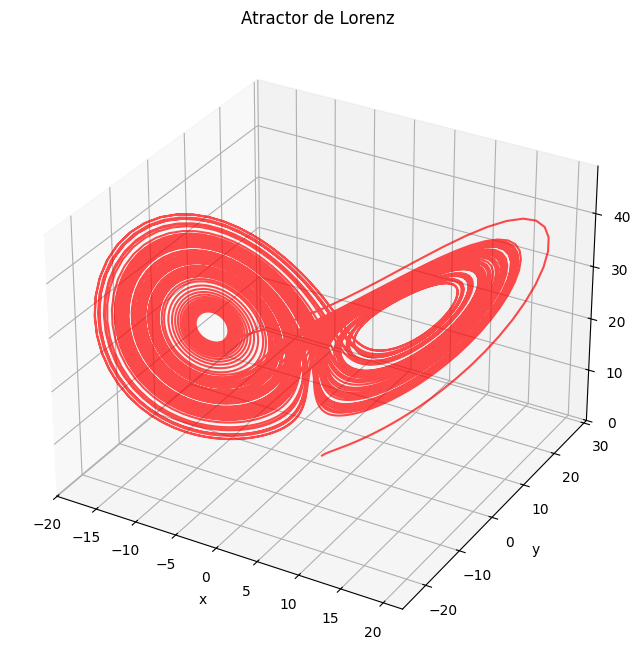

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros del sistema
a = 10.0
b = 28.0
c = 8.0 / 3.0

# Sistema de ecuaciones diferenciales
def Lorenz(estado, t):
    x, y, z = estado
    dx_dt = a * (y - x)
    dy_dt = x * (b - z) - y
    dz_dt = x * y - c * z
    return np.array([dx_dt, dy_dt, dz_dt])

# Parámetros de integración
t0, tf = 0, 100
h = 0.01

estado0 = [1.0, 1.0, 1.0]

# Espacio para el RK-4
def rk4(f, x0, t0, tf, h):
    n = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, n+1)
    x_values = np.zeros((n+1, len(x0)))
    x_values[0] = x0
    
    for i in range(n):
        t = t_values[i]
        x = x_values[i]
        
        k1 = h * f(x, t)
        k2 = h * f(x + k1/2, t + h/2)
        k3 = h * f(x + k2/2, t + h/2)
        k4 = h * f(x + k3, t + h)
        
        x_values[i+1] = x + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t_values, x_values

# Solución
t_array, estado_array = rk4(Lorenz, estado0, t0, tf, h)

# Gráfica
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(estado_array[:, 0], estado_array[:, 1], estado_array[:, 2], color='red', alpha=0.7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Atractor de Lorenz')
plt.show()

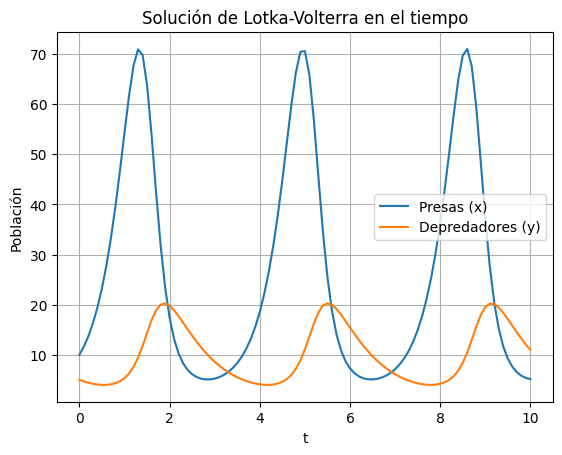

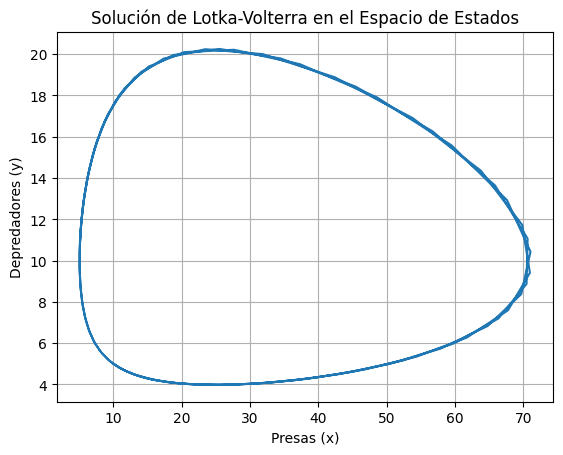

In [11]:
import numpy as np
import matplotlib.pyplot as plt
 
def lotka_volterra(z,t, alpha1, alpha2, beta1, beta2):
    x = z[0]
    y = z[1]
    dx_dt = alpha1 * x - beta1 * x * y
    dy_dt = -alpha2 * y + beta2 * x * y
    return np.array([dx_dt, dy_dt])
 
#Espacio para el RK4
def rk4(f, t0, z0, h, n, alpha1, alpha2, beta1, beta2):
    t_values = [t0]
    z_values = [z0]
    
    for i in range(n):
        t = t_values[-1]
        z = z_values[-1]
        
        k1 = h * f(z, t, alpha1, alpha2, beta1, beta2)
        k2 = h * f(z + k1/2, t + h/2, alpha1, alpha2, beta1, beta2)
        k3 = h * f(z + k2/2, t + h/2, alpha1, alpha2, beta1, beta2)
        k4 = h * f(z + k3, t + h, alpha1, alpha2, beta1, beta2)
        t_values.append(t+h)
        z_values.append(z + (k1 + 2*k2 + 2*k3 + k4) / 6) 
    
    return t_values, np.array(z_values)
# Parámetros de Lotka-Volterra
alpha1 = 3
alpha2 = 1.2
beta1 = 3/10
beta2 = 1.2/25
 
# Condiciones iniciales
x0 = 10 #numero de presas
y0 = 5 #numero de predadores
 
# Parámetros para Runge-Kutta
t0 = 0  # Valor inicial de t
h = 0.1  # Tamaño del paso
n = int(10 / h)  # Número de pasos para t en [0, 10]
 
# Resolución del sistema de ecuaciones
t_values, z_values = rk4(lotka_volterra, t0, np.array([x0, y0]), h, n, alpha1, alpha2, beta1, beta2)
 
# Gráfica de la solución en el tiempo
plt.plot(t_values, z_values[:, 0], label='Presas (x)')
plt.plot(t_values, z_values[:, 1], label='Depredadores (y)')
plt.xlabel('t')
plt.ylabel('Población')
plt.title('Solución de Lotka-Volterra en el tiempo')
plt.legend()
plt.grid(True)
plt.show()
 
# Gráfica de la solución en el espacio de estados
plt.plot(z_values[:, 0], z_values[:, 1])
plt.xlabel('Presas (x)')
plt.ylabel('Depredadores (y)')
plt.title('Solución de Lotka-Volterra en el Espacio de Estados')
plt.grid(True)
plt.show()